<a href="https://colab.research.google.com/github/BorisOskolkov/MLcourse/blob/main/asng02/A02_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Made by Boris Oskolkov for Assignment03 (CS5783)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import string
import pandas as pd
from IPython.display import Image

# Define activation function
def sigmoid(z):
	return 1/(1 + np.exp(-z))

def sigmoid_derivative(z):
  return sigmoid(z)*(1-sigmoid(z))

 --------- start of a first problem --------------

So, we need to create update rule for 2-layer regression model. For that we need to find how to calculate changing of weights and biases for 1st and 2nd layer. Assume, that we have simple 1-perceptron model. I will use chain rule for deriving the update rule.

Denote x as input, y as output, z(n) as linear equation of nth layer, σ(z) is activation function - sigmoid, a(n) as output of nth layer. L is for the loss between output layer and training data (we use MSE). So, our model will looks like the following. 

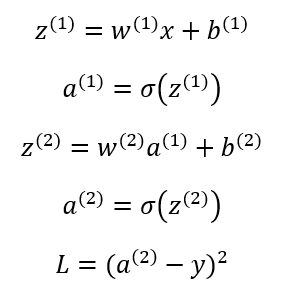

To derive update rule, we have to find following terms (we need update weights and biases).

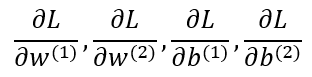

To find these terms I will apply chain rule. All calculations presented below

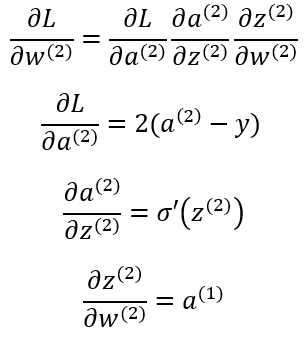

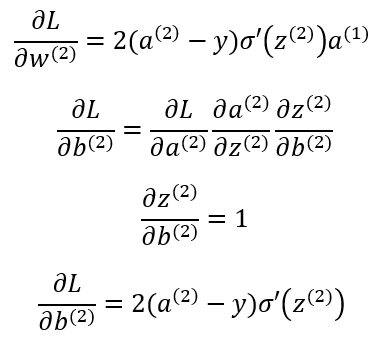

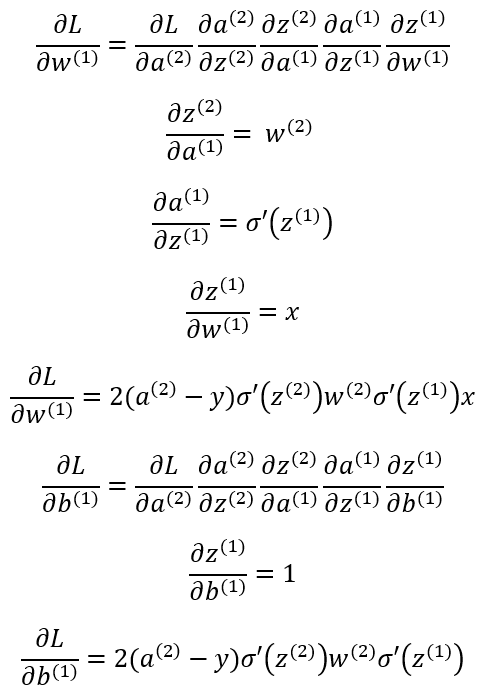

So, update rule will follow:

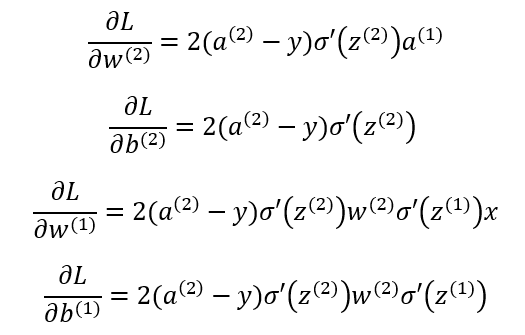

The difference, which i see between applying log-loss error and MSE error is that MSE error drive learning 2 times faster.

--------- end of a first problem --------------

--------- start of a second problem --------------

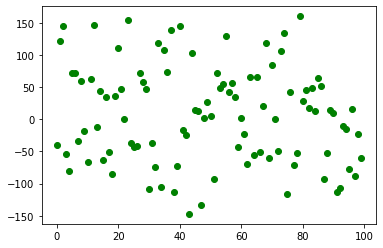

In [173]:
# Define given data
x = np.loadtxt("X_train.csv")
y = np.loadtxt("Y_train.csv")
plt.plot(y, 'go')
plt.show()


**Answer to the first question:**


I see that train output in range [-150;150]. So, I will use linear activation function for output layer to let our network output these numbers. 

In [174]:
print(f'X\'s shape is {np.shape(x)}')
print(f'Y\'s shape is {np.shape(y)}')

X's shape is (100, 2)
Y's shape is (100,)


**Answer to the second question:**

I will use three neurons in hidden layer and one in output layer, since we have 100 entries for 2 features and 100 values in output data. For that I will initialize weights and biases for every neuron.

Let's do forward pass.

In [175]:
# Define weights and biases
# three neurons in first layer
W1 = np.random.rand(3,2)
b1 = np.random.rand(3,1)

# output neuron in second layer
W2 = np.random.rand(3,1)
b2 = np.random.rand(1,1)

In [176]:
# Fwd Pass
z1 = np.dot(W1,x.T) + b1
a1 = sigmoid(z1)

z2 = np.dot(W2.T,a1) + b2
a2 = z2
 # Initial output
m=100
mse = np.sum((a2-y)**2)/(2*m)
print(f"MSE is equal to {mse}")

MSE is equal to 2826.379514574988


Our model based on random values resulted MSE as mentioned (it is quite big). Now we need to update weights and biases using backpropagation.

In [177]:
# Backward pass

# Compute gradients
dz2 = (a2 - y)/m
dW2 = np.dot(a1,dz2.T)
db2 = np.sum(dz2)
dz1 = W2*dz2*sigmoid_derivative(z1)
dW1 = np.dot(dz1,x)
db1 = np.sum(dz1, axis = 1).reshape(3,1)


In [178]:
 # Update weights
W1 = W1 - dW1
W2 = W2 - dW2
b1 = b1 - db1
b2 = b2 - db2

**Answer to the 3rd question:**

For model tested I have reported  average MSE and accuracy. As it not quitely proper to calculate accuracy for regression task (which we have here), i will use root mean suare error divided by maximum value (let it be 150).

In [197]:
# Fwd Pass
z1 = np.dot(W1,x.T) + b1
a1 = sigmoid(z1)

z2 = np.dot(W2.T,a1) + b2
a2 = z2
 # Initial output
#print("Prediction:", a2, "Actual:", y)
m=100
mse = np.sum((a2-y)**2)/(2*m)
accuracy = np.sum((np.sqrt((a2-y)**2)/150))/m
print(f"MSE is equal to {mse}. Accuracy is {accuracy}")

MSE is equal to 1923.7005236935668. Accuracy is 0.3382385051333084


After updating weights and biases MSE becomes smaller, so we can implement this code to train our network until convergence. I will define a function for that and apply it.

In [153]:
def forward_pass(x, W1, W2, b1, b2):
  z1 = np.dot(W1,x.T) + b1
  a1 = sigmoid(z1)

  z2 = np.dot(W2.T,a1) + b2
  a2 = z2
  return z1,a1,z2,a2


In [243]:
def train_network(x, y, W1, W2, b1, b2, lr, n_it, n_n):
  z1,a1,z2,a2 = forward_pass(x, W1, W2, b1, b2)
  m=y.shape[0]
  mse = np.zeros(n_it,)
  accuracy = np.zeros(n_it,)
  # Backward pass
  for i in range(n_it):
    # Compute gradients
    dz2 = (a2 - y)/m
    dW2 = np.dot(a1,dz2.T)
    db2 = np.sum(dz2)
    dz1 = W2*dz2*sigmoid_derivative(z1)
    dW1 = np.dot(dz1,x)
    db1 = np.sum(dz1, axis = 1).reshape(n_n,1)
    # Update weights and biases
    W1 = W1 - lr*dW1
    W2 = W2 - lr*dW2
    b1 = b1 - lr*db1
    b2 = b2 - lr*db2

    z1,a1,z2,a2 = forward_pass(x, W1, W2, b1, b2)
    
    m=y.shape[0]
    mse[i] = np.sum((a2-y)**2)/(2*m)
    accuracy[i] = np.sum(1-(np.sqrt((a2-y)**2)/150))/m
    #print(f"MSE is equal to {mse[i]}, iteration #{i+1}, learning rate is {lr}")
    
  print(f"MSE is equal to {mse[i]}, iteration #{i+1}, learning rate is {lr}, accuracy is {accuracy[i]}")
  prediction = a2
  return W1, W2, b1, b2, prediction, mse, accuracy


**Answer to the 4th question:**



MSE is equal to 2501.329813664354, iteration #100, learning rate is 0.002, accuracy is 0.6074503989715667
MSE is equal to 2113.268401692202, iteration #200, learning rate is 0.002, accuracy is 0.6492915181247302
MSE is equal to 1843.047641917524, iteration #300, learning rate is 0.002, accuracy is 0.6827935775668267
MSE is equal to 1642.2647364337527, iteration #400, learning rate is 0.002, accuracy is 0.7109967790081809
MSE is equal to 1484.49981760875, iteration #500, learning rate is 0.002, accuracy is 0.7341888477509632
MSE is equal to 1355.565503585486, iteration #600, learning rate is 0.002, accuracy is 0.7499956922098014
MSE is equal to 1247.1984618272822, iteration #700, learning rate is 0.002, accuracy is 0.7615795982986044
MSE is equal to 1154.2393525593072, iteration #800, learning rate is 0.002, accuracy is 0.771671134367961
MSE is equal to 1073.1089540323844, iteration #900, learning rate is 0.002, accuracy is 0.7806501936386924
MSE is equal to 1001.1296842903154, iteratio

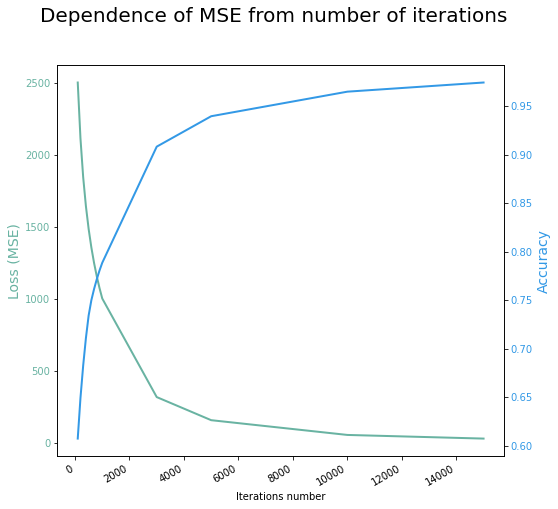

In [272]:
# weights and biases in first layer
W1 = np.random.rand(3,2)
b1 = np.random.rand(3,1)

# weights and biases in second layer
W2 = np.random.rand(3,1)
b2 = np.random.rand(1,1)

#various_iterations_number = np.arange(100,15000,500) #takes too long
various_iterations_number = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 3000, 5000, 10000, 15000])
mse_plot = np.zeros(np.shape(various_iterations_number))
accuracy_plot = np.zeros(np.shape(various_iterations_number))
j=0
for i in various_iterations_number:
  __, __, __, __, __, mse, accuracy = train_network(x, y, W1, W2, b1, b2, 0.002, i, 3)
  mse_plot[j]=mse[len(mse)-1]
  accuracy_plot[j]=accuracy[len(accuracy)-1]
  j+=1

# setting the plot
COLOR_MSE = "#69b3a2"
COLOR_ACC = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(various_iterations_number, mse_plot, color=COLOR_MSE, lw=2)
ax2.plot(various_iterations_number, accuracy_plot, color=COLOR_ACC, lw=2)

ax1.set_xlabel("Iterations number")
ax1.set_ylabel("Loss (MSE)", color=COLOR_MSE, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_MSE)

ax2.set_ylabel("Accuracy", color=COLOR_ACC, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_ACC)

fig.suptitle("Dependence of MSE from number of iterations", fontsize=20)
fig.autofmt_xdate()



As you could mention I have designed function for various number of hidden neurons. I have done this to test which composition will work better. For that I will plot the learning perfomance (based on MSE) of my network composed from different number neurons in hidden layer.

In [276]:
def show_mse_change_for_2_layer_regr_nn(number_of_hidden_neurons):
  n_of_iterations = 5000
  # weights and biases in first layer
  W1 = np.random.rand(number_of_hidden_neurons,2)
  b1 = np.random.rand(number_of_hidden_neurons,1)

  # weights and biases in second layer
  W2 = np.random.rand(number_of_hidden_neurons,1)
  b2 = np.random.rand(1,1)
  print(f"Results of learning network with {number_of_hidden_neurons} hidden neurons")
  __, __, __, __, __, mse1, __ = train_network(x, y, W1, W2, b1, b2, 0.002, n_of_iterations, number_of_hidden_neurons)
  __, __, __, __, __, mse2, __ = train_network(x, y, W1, W2, b1, b2, 0.02, n_of_iterations, number_of_hidden_neurons)
  __, __, __, __, __, mse3, __ = train_network(x, y, W1, W2, b1, b2, 0.1, n_of_iterations, number_of_hidden_neurons)
  plt.plot(mse1, label='learning rate is 0.002')
  plt.plot(mse2, label='learning rate is 0.02')
  plt.plot(mse3, label='learning rate is 0.1')
  plt.title(f"Learning network with {number_of_hidden_neurons} hidden neurons")
  plt.xlabel("Iteration")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

**Answer to the 6a question:**

Update rule of the neural network doesn't change, since we use same activation functions. Only thing that change is dimensions of our values - weights, biases and their derivartives.

Results of learning network with 1 hidden neurons
MSE is equal to 491.7697760998192, iteration #5000, learning rate is 0.002, accuracy is 0.8614903974818943
MSE is equal to 588.292074569454, iteration #5000, learning rate is 0.02, accuracy is 0.8065450993296404
MSE is equal to 827.7863117441068, iteration #5000, learning rate is 0.1, accuracy is 0.7774487437943747


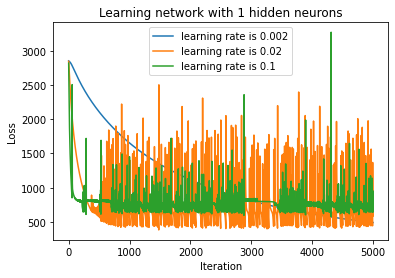

Results of learning network with 2 hidden neurons
MSE is equal to 229.63429190285942, iteration #5000, learning rate is 0.002, accuracy is 0.9169687460291585
MSE is equal to 244.1420202948702, iteration #5000, learning rate is 0.02, accuracy is 0.8786568892119159
MSE is equal to 312.4970072728966, iteration #5000, learning rate is 0.1, accuracy is 0.8567985933611564


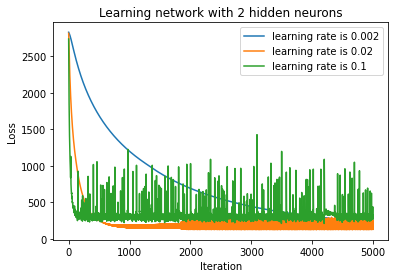

Results of learning network with 3 hidden neurons
MSE is equal to 154.8846595578929, iteration #5000, learning rate is 0.002, accuracy is 0.9398066919789997
MSE is equal to 38.45515318604799, iteration #5000, learning rate is 0.02, accuracy is 0.9527718729904312
MSE is equal to 86.94661958344022, iteration #5000, learning rate is 0.1, accuracy is 0.9279810130156229


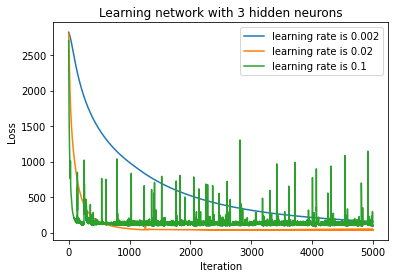

Results of learning network with 4 hidden neurons
MSE is equal to 122.4352987684736, iteration #5000, learning rate is 0.002, accuracy is 0.9523655890410703
MSE is equal to 9.250200469752194, iteration #5000, learning rate is 0.02, accuracy is 0.9789813634675404
MSE is equal to 109.19217453879723, iteration #5000, learning rate is 0.1, accuracy is 0.9234511725615617


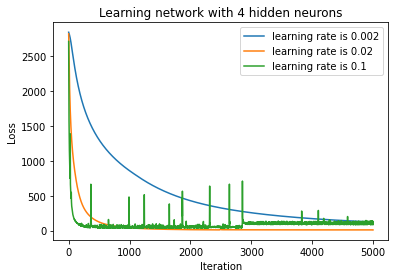

Results of learning network with 5 hidden neurons
MSE is equal to 105.92055786211705, iteration #5000, learning rate is 0.002, accuracy is 0.9566308580173005
MSE is equal to 2.8013962947233706, iteration #5000, learning rate is 0.02, accuracy is 0.9934946192166589
MSE is equal to 31.936670533912253, iteration #5000, learning rate is 0.1, accuracy is 0.9576652533465535


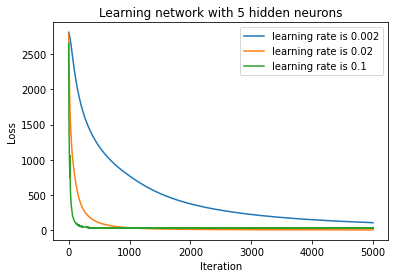

Results of learning network with 6 hidden neurons
MSE is equal to 98.01203514126732, iteration #5000, learning rate is 0.002, accuracy is 0.957463522273457
MSE is equal to 2.2231457930191705, iteration #5000, learning rate is 0.02, accuracy is 0.9950008638366757
MSE is equal to 20.55975179963671, iteration #5000, learning rate is 0.1, accuracy is 0.9643083194007354


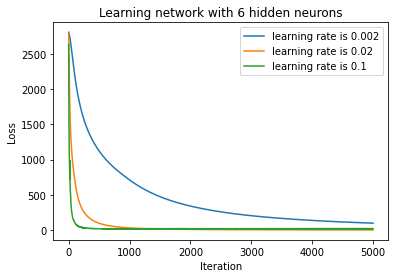

Results of learning network with 7 hidden neurons
MSE is equal to 90.47155227711231, iteration #5000, learning rate is 0.002, accuracy is 0.9599441041628529
MSE is equal to 1.8873312314433788, iteration #5000, learning rate is 0.02, accuracy is 0.9962909331336186
MSE is equal to 8.040204040498404, iteration #5000, learning rate is 0.1, accuracy is 0.9775824382164059


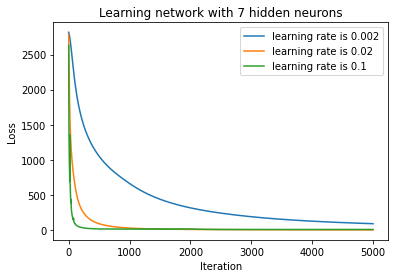

Results of learning network with 8 hidden neurons
MSE is equal to 84.92355195941145, iteration #5000, learning rate is 0.002, accuracy is 0.9623803099873021
MSE is equal to 1.8906153595438608, iteration #5000, learning rate is 0.02, accuracy is 0.9961610314344865
MSE is equal to 2.345475781339332, iteration #5000, learning rate is 0.1, accuracy is 0.9875144202235618


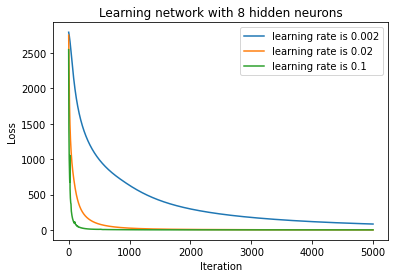

Results of learning network with 9 hidden neurons
MSE is equal to 81.49120129498243, iteration #5000, learning rate is 0.002, accuracy is 0.9642682004494619
MSE is equal to 1.7601946941808677, iteration #5000, learning rate is 0.02, accuracy is 0.9967152783707809
MSE is equal to 0.8329856955664999, iteration #5000, learning rate is 0.1, accuracy is 0.9924399696674004


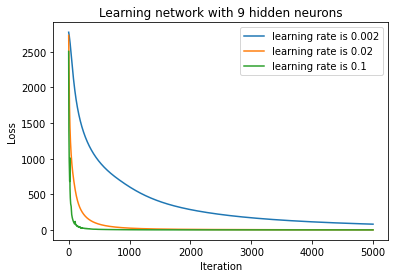

Results of learning network with 10 hidden neurons
MSE is equal to 79.3278068174248, iteration #5000, learning rate is 0.002, accuracy is 0.9637785859138158
MSE is equal to 1.69196508474735, iteration #5000, learning rate is 0.02, accuracy is 0.996652153751077
MSE is equal to 1.3828226000153914, iteration #5000, learning rate is 0.1, accuracy is 0.9906230643007495


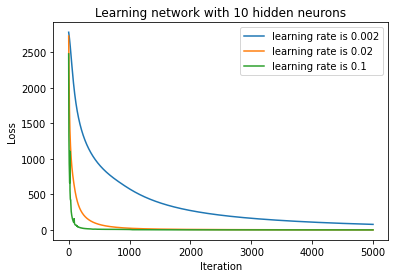

In [277]:
for i in range(10):
  show_mse_change_for_2_layer_regr_nn(i+1)

Based on reported data I assume that convergent neural network could be trained with 5 hidden neurons after 5000 iteraions and 0.02 learning rate. While we have significantly smaller MSE in more complex model (which has 10 neurons, for example), it is, in my opinion, overfitted.

So, I will train my network and validate it on test data.

In [164]:
n_of_iterations = 5000
number_of_hidden_neurons = 5
# weights and biases in first layer
W1 = np.random.rand(number_of_hidden_neurons,2)
b1 = np.random.rand(number_of_hidden_neurons,1)

# weights and biases in second layer
W2 = np.random.rand(number_of_hidden_neurons,1)
b2 = np.random.rand(1,1)
W1, W2, b1, b2, __, __ = train_network(x, y, W1, W2, b1, b2, 0.02, n_of_iterations, number_of_hidden_neurons)

MSE is equal to 2.8134621686898322, iteration #5000, learning rate is 0.02


In [165]:
x_test = np.loadtxt("X_test.csv")
y_test = np.loadtxt("Y_test.csv")

# Fwd Pass
_,_,_,a2 = forward_pass(x_test, W1, W2, b1, b2)
 # Initial output
#print("Prediction:", a2, "Actual:", y)
m=y_test.shape[0]
mse = np.sum((a2-y_test)**2)/(2*m)
print(f"MSE is equal to {mse}")

MSE is equal to 33.04179084383995


**Answer to the 6b question:**

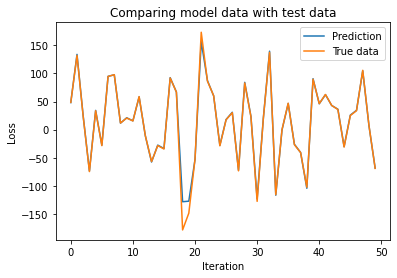

In [172]:
  plt.plot(a2.flatten(), label='Prediction')
  plt.plot(y_test, label='True data')
  plt.title(f"Comparing model data with test data")
  plt.xlabel("Iteration")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

--------- end of a second problem --------------